In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/street-view-house-nos-h5-file/SVHN_single_grey1.h5


In [2]:
import h5py
filepath = '/kaggle/input/street-view-house-nos-h5-file/SVHN_single_grey1.h5'
data = {}
f = h5py.File(filepath)
for k, v in f.items():
    data[k] = np.array(v)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [3]:
data.keys()

dict_keys(['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'])

In [4]:
def shaffle_indexes(data, max_samples=2000, seed = 10):
    np.random.seed(seed)
    indexes = np.random.choice(np.arange(data.shape[0]),
                               max_samples,
                               replace=False)
    return indexes


train_X = data["X_train"][shaffle_indexes(data["X_train"])]
train_y = data["y_train"][shaffle_indexes(data["y_train"])]
test_X = data["X_test"][shaffle_indexes(data["X_test"], 200)]
test_y = data["y_test"][shaffle_indexes(data["y_test"], 200)]
test_y[test_y == 10] = 0

In [5]:
train_X[0], train_y[:10]

(array([[125.0602, 126.0601, 126.946 , ..., 139.0111, 131.1259, 195.3951],
        [118.1641, 117.6803, 116.9685, ..., 138.837 , 130.9518, 195.808 ],
        [111.2402, 109.7565, 108.9307, ..., 139.065 , 131.0658, 195.808 ],
        ...,
        [ 98.0691, 103.0255, 110.5687, ..., 127.7519, 124.9802, 194.178 ],
        [108.2099, 114.2802, 121.3504, ..., 131.9364, 128.7518, 196.0638],
        [116.2199, 119.8066, 122.3503, ..., 134.0502, 130.2355, 196.3627]],
       dtype=float32),
 array([8, 7, 1, 3, 3, 5, 3, 9, 5, 3], dtype=uint8))

In [6]:
test_X[0], test_y[0]

(array([[133.0173, 132.0174, 133.9032, ..., 121.9968, 122.9967, 124.2246],
        [129.5446, 128.5447, 131.0175, ..., 123.1107, 123.2247, 123.3387],
        [120.6595, 120.3606, 124.3602, ..., 119.2251, 119.3391, 119.752 ],
        ...,
        [ 98.8358, 101.8355, 110.8346, ...,  96.0857,  95.0858,  95.1998],
        [122.7194, 122.7194, 128.6048, ..., 110.9702, 109.9703, 110.9702],
        [145.7171, 143.1904, 144.0763, ..., 124.7408, 123.7409, 123.9689]],
       dtype=float32),
 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

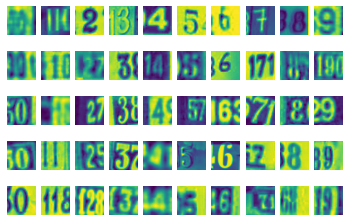

In [8]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

## KNN (k nearest neighbor) for binary classification.
Let's choose pictures with 0 and 9 labels only and train a model.

In [9]:
binary_train_mask = (train_y == 0) | (train_y == 9) # make a boolean mask choosing only 0 or 9 labels
binary_train_X = train_X[binary_train_mask] # applying boolean mask on train samples
binary_train_y = train_y[binary_train_mask] == 0 # applying boolean mask on train labels and choosing
                                                 # only 0 labels since it is bynary claasification.
                                                 # If sample isn't 0, it is 9.

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [10]:
binary_train_X[0]

array([200.2357, 199.1218, 200.0077, ..., 165.0499, 142.1169, 119.1839],
      dtype=float32)

In [11]:
binary_test_X[0]

array([152.6868, 151.1923, 149.2356, ..., 127.9649, 134.0244, 141.0237],
      dtype=float32)

In [12]:
binary_train_y[:20]

array([False,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False])

In [13]:
binary_test_y[:20]

array([False,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False])

## Creating a KNN class

In [14]:
class KNN:
    """
    K-neariest classifier using L1 loss (Manhattan distance)
    """
    def __init__(self, k=1):
        self.k = k
        
    def fit(self, X, y):
        self.train_X = X
        self.train_y = y
    
    def predict(self, X, num_loops=0):
        """
        Uses KNN model to predict classes for the data samples provided.
        
        Args:
            X (numpy array): an array of samples with certain number of features for prediction
            to run through the model.
            num_loops (int): which implementation to use.
            
        Returns:
            predictions (numpy array): numpy array of int values for each predcited class.
        """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        else:
            dists = self.compute_distances_two_loops(X)
            
        if self.train_y.dtype == np.bool:
            return self.predict_labels_binary(dists)
        else:
            return self.predict_labels_multiclass(dists)
        
    def compute_distances_two_loops(self, X):
        """
        Computes L1 distance (Manhattan distance) between every sample of X and every training sample.
        Uses the simpliest implementation with two Pyhton loops.
        
        Args:
            X (numpy array): an array of samples for computation.
            
        Returns:
            dists (numpy array): an array with L1 distance between each test and train samples. 
        """
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        dists = np.zeros((num_test, num_train), np.float32)
        for i_test in range(num_test):
            for i_train in range(num_train):
                dists[i_test, i_train] = np.abs(self.train_X[i_train] - X[i_test]).sum()
        return dists
        
    def compute_distances_one_loop(self, X):
        """
        Computes L1 distance (Manhattan distance) between every sample of X and every training sample.
        Vectorizes some calculations, so only one loop is used.
        
        Args:
            X (numpy array): an array of samples for computation.
            
        Returns:
            dists (numpy array): an array with L1 distance between each test and train samples. 
        """
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        dists = np.zeros((num_test, num_train), np.float32)
        for i_test in range(num_test):
            dists[i_test] = np.abs(self.train_X - X[i_test]).sum(axis=1)
        return dists
    
    def compute_distances_no_loops(self, X):
        """
        Computes L1 distance (Manhattan distance) for between every X sample and training sample.
        Fully vecrorises calculations.
        
        Args:
            X (numpy array): an array of samples for computation.
            
        Returns:
            dists (numpy array): an array with L1 distance between each test and train samples
        """
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        dists = np.zeros((num_test, num_train), np.float32) # np.float32 instead of np.float64 (default)\
                                                            # to save memory
        dists = np.abs(X[:,np.newaxis,:] - self.train_X[np.newaxis,:,:]).sum(axis=2)
        return dists
    
    def predict_labels_binary(self, dists):
        """
        Returns model predictions for binary classfification case.
        
        Args:
            dists (numpy array): an array of distances between each test and train samples.
            
        Returns:
            pred (numby array of Bool): binary predictions for every test sample.
        """
        num_test = dists.shape[0]
        pred = np.zeros(num_test, np.bool)
        if self.k == 1:
            pred = self.train_y[np.argpartition(dists, 1)[:,: 1]].flatten()
        else:
            pred = (self.train_y[np.argpartition(dists, kth = self.k)[:,: self.k]]).mean(axis=1) > 0.5
        return pred
    
    def predict_labels_multiclass(self, dists):
        '''
        Returns model predictions for multi-class classification case.
        
        Args:
            dists (numpy array): an array of distances between each test and each train sample.
        
        Returns:
            pred (numpy array of int): predicted class index for every test sample
        '''
        num_test = dists.shape[0]
        pred = np.zeros(num_test, np.int)
        k_neighbor_pred = self.train_y[np.argpartition(dists, kth = self.k)[:,: self.k]]
        for i in range(num_test):
            values, counts = np.unique(k_neighbor_pred[i, :], return_counts=True)
            pred[i] = values[np.argmax(counts)]
        return pred

## Let's create an instance of the KNN class and compare perforamance of different approaches for distances calculation.

In [15]:
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)
knn_classifier.train_X[0]

array([200.2357, 199.1218, 200.0077, ..., 165.0499, 142.1169, 119.1839],
      dtype=float32)

In [16]:
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [17]:
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [18]:
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [19]:
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

170 ms ± 5.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.2 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.9 ms ± 524 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
prediction = knn_classifier.predict(binary_test_X)
prediction[:20]

array([ True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False,  True])

In [21]:
def binary_classification_metrics(prediction, ground_truth):
    '''
    Computes metrics for binary classification.
    
    Args:
        prediction (numpy array of bool): model predictions.
        ground_truth (numpy array of bool): true labels.
        
    Returns:
        precision, recall, f1, accuracy: classification metrics
    '''
    precision = 0
    recall = 0
    accuracy = 0
    f1 = 0
    
    precision = np.logical_and(prediction, ground_truth).sum() / prediction.sum()
    recall = np.logical_and(prediction, ground_truth).sum() / ground_truth.sum()
    f1 = 2 / (1 / precision + 1 / recall)
    accuracy = (np.logical_and(np.invert(prediction), np.invert(prediction)).sum() +
                np.logical_and(prediction, ground_truth).sum())/len(prediction)
    
    return precision, recall, f1, accuracy

In [22]:
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print(f"KNN with k = {knn_classifier.k}.")
print(f'Accuracy: {format(accuracy, ".2f")}, Precision: {format(precision, ".2f")}, Recall: {format(recall, ".2f")}, F1: {format(f1, ".2f")}.')

KNN with k = 1.
Accuracy: 0.66, Precision: 0.44, Recall: 0.60, F1: 0.51.


In [23]:
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)
prediction

array([False,  True, False, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False,  True])

In [24]:
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print(f"KNN with k = {knn_classifier_3.k}.")
print(f'Accuracy: {format(accuracy, ".2f")}, Precision: {format(precision, ".2f")}, Recall: {format(recall, ".2f")}, F1: {format(f1, ".2f")}.')

KNN with k = 3.
Accuracy: 0.70, Precision: 0.50, Recall: 0.65, F1: 0.57.


# Multiclass classification

In [25]:
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [26]:
predict = knn_classifier.predict(test_X)
predict

array([5, 0, 1, 8, 3, 3, 3, 8, 2, 1, 8, 8, 0, 6, 9, 1, 4, 0, 1, 7, 5, 3,
       5, 5, 9, 9, 5, 6, 9, 9, 7, 3, 1, 8, 6, 8, 4, 7, 6, 7, 5, 2, 3, 2,
       6, 5, 2, 8, 6, 6, 3, 1, 6, 0, 7, 6, 6, 3, 7, 8, 1, 6, 0, 2, 2, 8,
       1, 2, 5, 4, 6, 5, 2, 2, 3, 4, 0, 1, 7, 5, 2, 8, 4, 0, 8, 1, 6, 7,
       1, 2, 9, 6, 3, 0, 4, 4, 4, 9, 7, 4, 3, 3, 1, 5, 6, 8, 1, 6, 5, 1,
       0, 0, 3, 1, 0, 2, 6, 8, 5, 4, 6, 2, 7, 6, 1, 3, 7, 0, 1, 1, 3, 9,
       6, 9, 8, 4, 0, 0, 2, 2, 0, 4, 9, 4, 4, 2, 3, 6, 3, 6, 6, 9, 7, 4,
       2, 7, 0, 2, 3, 3, 0, 8, 5, 9, 7, 5, 8, 9, 4, 5, 4, 9, 4, 4, 9, 6,
       6, 2, 0, 3, 4, 5, 8, 8, 4, 7, 1, 3, 1, 7, 5, 9, 7, 9, 4, 3, 0, 6,
       9, 7])

In [27]:
def multiclass_accuracy(prediction, ground_truth):
    '''
    Computes metrics for multiclass classification.
    
    Args:
        prediction (numpy array of int): model predictions.
        ground_truth (numpy array of int): true labels.
        
    Returns:
        accuracy: ratio of accurate predictions to total samples.
    '''
    confusion_matrix = np.zeros((10,10), np.int)
    np.add.at(confusion_matrix, [prediction, ground_truth], 1)
    accuracy = np.trace(confusion_matrix) / confusion_matrix.sum()
    return accuracy

In [28]:
accuracy = multiclass_accuracy(predict, test_y)
print(f'Accuracy: {format(accuracy, ".2f")}.')

Accuracy: 0.20.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


## Let's find the best k using cross-validation based on accuracy

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.

In [29]:
num_folds = 5
train_folds_X = []
train_folds_y = []

fold_length = len(train_X) // num_folds
for f in range(num_folds):
    train_folds_X.append(train_X[f * fold_length : (f + 1) * fold_length, :])
    train_folds_y.append(train_y[f * fold_length : (f + 1) * fold_length])

In [30]:
train_folds_X[4].shape

(400, 1024)

In [31]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    k_fold_accuracy = list()
    knn_classifier = KNN(k)
    for f in range(num_folds):
        train_X = np.vstack([train_folds_X[i] for i in range(num_folds) if i != f])
        train_X = train_X.reshape(train_X.shape[0], -1)
        train_y = np.hstack([train_folds_y[i] for i in range(num_folds) if i != f])
        test_X = train_folds_X[f].reshape(train_folds_X[f].shape[0], -1)
        test_y = train_folds_y[f]
        
        knn_classifier.fit(train_X, train_y)
        predict = knn_classifier.predict(test_X)
        accuracy = multiclass_accuracy(predict, test_y)
        k_fold_accuracy.append(accuracy)
    k_to_accuracy[k] = np.mean(k_fold_accuracy)

for k in sorted(k_to_accuracy):
    print(f'k = {format(k, "d")}, accuracy = {format(k_to_accuracy[k], ".3f")}')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


k = 1, accuracy = 0.255
k = 2, accuracy = 0.235
k = 3, accuracy = 0.253
k = 5, accuracy = 0.241
k = 8, accuracy = 0.248
k = 10, accuracy = 0.256
k = 15, accuracy = 0.259
k = 20, accuracy = 0.269
k = 25, accuracy = 0.262
k = 50, accuracy = 0.241


Text(0, 0.5, 'Accuracy.')

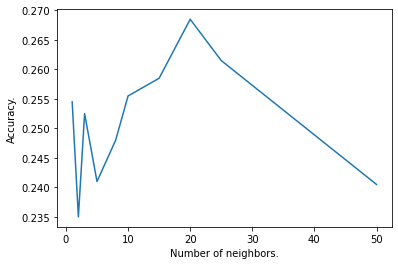

In [32]:
plt.plot(list(k_to_accuracy.keys()), list(k_to_accuracy.values()))
plt.xlabel("Number of neighbors.")
plt.ylabel("Accuracy.")

## Finally we'll implement the best k on our test dataset.

In [33]:
best_k = 20

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

accuracy = multiclass_accuracy(prediction, test_y)
print(f'Accuracy: {format(accuracy, ".3f")}.')

Accuracy: 0.282.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


# Notes.

# Broadcasting in Numpy and argspartition to find k elements with a smallest distances (L1).

> The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.

You can look at the term "broadcating" [here](https://numpy.org/doc/stable/user/basics.broadcasting.html).
Let's see an example below.

We'll create two 2D arrays (x, y) having diferent number of rows but the same number of columns.

In [34]:
x = np.array(np.linspace(1,30, 30)).reshape(5,-1)
x

array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.],
       [19., 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30.]])

In [35]:
y = np.array(np.linspace(1,18,18)).reshape(3,-1)
y

array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.]])

Let's insert a __np.newaxis__ in 2D array to convert them in 3D arrays.

In [36]:
y[:,np.newaxis,:] 

array([[[ 1.,  2.,  3.,  4.,  5.,  6.]],

       [[ 7.,  8.,  9., 10., 11., 12.]],

       [[13., 14., 15., 16., 17., 18.]]])

In [37]:
x[np.newaxis,:,:]

array([[[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11., 12.],
        [13., 14., 15., 16., 17., 18.],
        [19., 20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29., 30.]]])

Performance of an substraction operation results in that every row of ___x___ substracted from 1D array (row wise) of what was a row of 2D array of ___y___. Look at a result below.

In [38]:
z = y[:,np.newaxis,:] - x[np.newaxis,:,:]
z

array([[[  0.,   0.,   0.,   0.,   0.,   0.],
        [ -6.,  -6.,  -6.,  -6.,  -6.,  -6.],
        [-12., -12., -12., -12., -12., -12.],
        [-18., -18., -18., -18., -18., -18.],
        [-24., -24., -24., -24., -24., -24.]],

       [[  6.,   6.,   6.,   6.,   6.,   6.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [ -6.,  -6.,  -6.,  -6.,  -6.,  -6.],
        [-12., -12., -12., -12., -12., -12.],
        [-18., -18., -18., -18., -18., -18.]],

       [[ 12.,  12.,  12.,  12.,  12.,  12.],
        [  6.,   6.,   6.,   6.,   6.,   6.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [ -6.,  -6.,  -6.,  -6.,  -6.,  -6.],
        [-12., -12., -12., -12., -12., -12.]]])

In [39]:
np.abs(z)

array([[[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 6.,  6.,  6.,  6.,  6.,  6.],
        [12., 12., 12., 12., 12., 12.],
        [18., 18., 18., 18., 18., 18.],
        [24., 24., 24., 24., 24., 24.]],

       [[ 6.,  6.,  6.,  6.,  6.,  6.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 6.,  6.,  6.,  6.,  6.,  6.],
        [12., 12., 12., 12., 12., 12.],
        [18., 18., 18., 18., 18., 18.]],

       [[12., 12., 12., 12., 12., 12.],
        [ 6.,  6.,  6.,  6.,  6.,  6.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 6.,  6.,  6.,  6.,  6.,  6.],
        [12., 12., 12., 12., 12., 12.]]])

Now we can sum up values along the last dimension, so we'll get arrays of distances from every vector of ___y___ to the every vector of ___x___ in a form of 2D array ___w___.

So

___w[0,0]___  = sum(abs(___x[0]___ - ___y[0]___)),

___w[0,1]___ = sum(abs(___x[0]___ - ___y[1]___),

and so on.

In [40]:
w = np.abs(z).sum(axis=2)
w

array([[  0.,  36.,  72., 108., 144.],
       [ 36.,   0.,  36.,  72., 108.],
       [ 72.,  36.,   0.,  36.,  72.]])

We can use Numpy function [__numpy.argspartition(a, kth)__](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html) to find the indexes of k smallest elements in an array.

In [41]:
k = 3
idx = np.argpartition(w,kth=k)[:,: k]
idx

array([[1, 0, 2],
       [1, 2, 0],
       [3, 2, 1]])

Applying an array of indexes on a boolean array of labels (classes) chaining with __.mean()__ and condition that every element should be higher than __0.5__, we'll get an boolean array of predictions.  

In [42]:
b = np.array([True, False, False, True, True])
(b[idx]).mean(axis=1) > 0.5

array([False, False, False])

In [43]:
c = np.array([1,2,2,3,3])
d = c[idx]
d

array([[2, 1, 2],
       [2, 2, 1],
       [3, 2, 2]])

In [44]:
values, counts = np.unique(d[0], return_counts=True)
values[np.argmax(counts)]

2

In [45]:
a = np.array([True, True, False, False])
b = np.array([True, False, False, False])
np.logical_and(a,b).sum()

1

In [46]:
np.logical_and(np.invert(a), np.invert(b))

array([False, False,  True,  True])